# **MPA-MLF Miniproject**
# Classification of wireless transmiters
### Daniel Havránek

In [44]:
from google.colab import drive
drive.mount('/content/drive')

import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.optimizers import SGD, RMSprop, Adam, Adadelta, Adagrad, Adamax, Nadam, Ftrl
from keras.datasets import cifar10
from keras.utils import to_categorical

x_test = pd.read_csv('drive/MyDrive/Colab Notebooks/x_test.csv')
x_in = pd.read_csv('drive/MyDrive/Colab Notebooks/x_train.csv')
y_in = pd.read_csv('drive/MyDrive/Colab Notebooks/y_train.csv')

x_train, x_test, y_train, y_test = train_test_split(x_in, y_in, test_size = 0.2)
x_train = x_train.drop("Unnamed: 0", axis=1)
x_train = x_train.drop("m_power", axis=1)
x_train = x_train.drop("Tosc", axis=1)
x_train = x_train.drop("Tmix", axis=1)
x_test = x_test.drop("Unnamed: 0", axis=1)
x_test = x_test.drop("m_power", axis=1)
x_test = x_test.drop("Tosc", axis=1)
x_test = x_test.drop("Tmix", axis=1)
y_train = y_train.drop("id", axis=1)
y_test = y_test.drop("id", axis=1)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [73]:
#labels = {0:'zero',1:'one',2:'two',3:'three',4:'four',5:'five',6:'six',7:'seven'}

x_train_scaled = x_train + abs(x_train.min())
x_train_scaled = x_train_scaled / x_train_scaled.max()

y_train_0 = y_train - 1
y_train_encoded = to_categorical(y_train.to_numpy().reshape(-1,1), num_classes=9)
print(y_train_encoded)
print(y_train)
print(y_train_0)

x_test_scaled = x_test + abs(x_test.min())
x_test_scaled = x_test_scaled / x_test_scaled.max()

y_test_encoded = to_categorical(y_test.to_numpy().reshape(-1,1), num_classes=9)
#y_train_encoded = y_train   # change later

[[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]
       target
2244        6
7636        5
7902        6
2048        4
3287        7
...       ...
12910       8
14384       7
14563       7
5032        5
1996        7

[12288 rows x 1 columns]
       target
2244        5
7636        4
7902        5
2048        3
3287        6
...       ...
12910       7
14384       6
14563       6
5032        4
1996        6

[12288 rows x 1 columns]


In [48]:
model = Sequential()
model.add(Dense(64, input_dim=8, activation='sigmoid'))
model.add(Dense(9, activation='softmax'))
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 64)                576       
                                                                 
 dense_16 (Dense)            (None, 9)                 585       
                                                                 
Total params: 1,161
Trainable params: 1,161
Non-trainable params: 0
_________________________________________________________________


In [49]:
optimizer = SGD(learning_rate = 0.1)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

history = model.fit(x_train_scaled, y_train_encoded, epochs=30, batch_size=64, validation_split = 0.2, verbose=0)

In [50]:
score = model.evaluate(x_test_scaled, y_test_encoded, verbose=0)
print('Test loss:', score[0])
print(f'Test accuracy: {score[1]*100} %')

Test loss: 0.3328981399536133
Test accuracy: 86.58854365348816 %


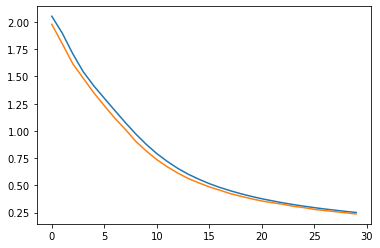

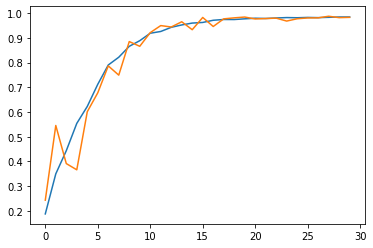

In [51]:
plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

plt.figure()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.show()

In [56]:
prediction = model.predict([x_test])
print(prediction)

96/96 [==============================] - 0s 1ms/step
[[2.0313876e-13 2.2335593e-09 4.3922496e-12 ... 1.2502964e-06
  9.9999881e-01 3.4755134e-14]
 [2.0313527e-13 2.2335551e-09 4.3921910e-12 ... 1.2503178e-06
  9.9999881e-01 3.4755527e-14]
 [2.0313799e-13 2.2335636e-09 4.3922413e-12 ... 1.2503035e-06
  9.9999881e-01 3.4755266e-14]
 ...
 [2.0315078e-13 2.2335720e-09 4.3924421e-12 ... 1.2502177e-06
  9.9999881e-01 3.4753606e-14]
 [2.0313527e-13 2.2335551e-09 4.3921910e-12 ... 1.2503178e-06
  9.9999881e-01 3.4755527e-14]
 [2.0318876e-13 2.2336233e-09 4.3930623e-12 ... 1.2499769e-06
  9.9999881e-01 3.4749100e-14]]


In [66]:
res = np.zeros_like(prediction)
res[np.arange(len(prediction)), prediction.argmax(1)] = 1
print(res)

[[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]]
